In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

### Here we have generated 1000 randon numbers with np.random

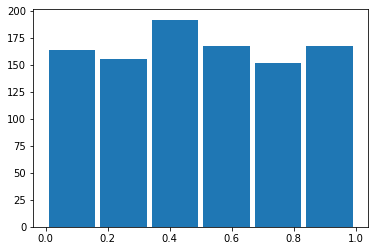

In [2]:
np.random.seed(101)
x = np.random.uniform(low=0, high=1, size=(1000))
plt.hist(x, bins = 6,rwidth=0.9,)
plt.show()

### Here I have created my own generator with Uniformly distributed sequences 

In [3]:
# a is irrational number
def my_gen (a):
    n = 1
    while True:
        i , k  = math.modf(n*a)
        n+=1
        yield i

sequence = my_gen(math.sqrt(2))
arr = np.zeros(1000)
for x in range(len(arr)):
    arr[x] = next(sequence)

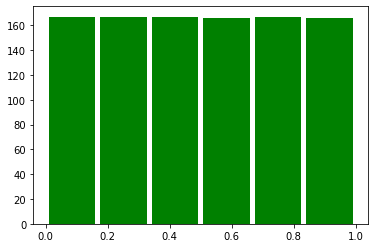

In [4]:
plt.hist(arr, bins = 6,
         rwidth=0.9,color= 'green')
plt.show()

### Using that logic there is the second generator which was required

In [5]:
n = 1 # n is defined global to not get the same distribution every time

In [6]:
def my_second_gen (a):
        global n
        while True:
            i , k  = math.modf(n*a)
            if i >= 0 and i<0.3:
                yield 1
            elif i >= 0.3 and i<0.45:
                yield 2
            elif i >= 0.45 and i<0.55:
                yield 4
            elif i >= 0.55 and i<0.63:
                yield 7
            else:
                yield 8
            n+=1
            

In [7]:
sequence = my_second_gen(math.pi)
arr = np.zeros(100000)
for x in range(len(arr)):
    arr[x] = next(sequence)

In [8]:
unique, counts = np.unique(arr, return_counts=True)
dict(zip(unique, counts))

{1.0: 29997, 2.0: 15000, 4.0: 10001, 7.0: 8001, 8.0: 37001}

In [9]:
np.mean(arr)

4.52016

In [10]:
def variance(data, ddof=0):
    n = len(data)
    mean = sum(data) / n
    return sum((x - mean) ** 2 for x in data) / (n - ddof)

In [11]:
variance(arr)

9.669413574403082

# 2

In [12]:
import scipy.stats as st

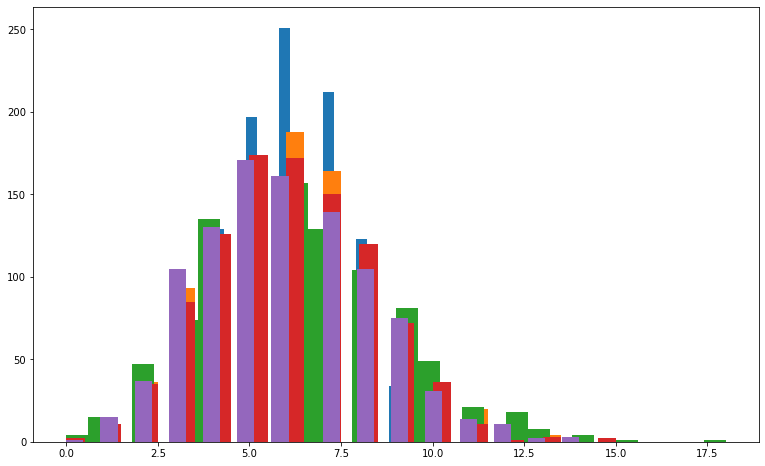

In [13]:
data_binom = st.binom.rvs(n = 10, p = 0.6, size = 1000)


plt.figure(figsize = (13,8)) 
plt.hist(data_binom, bins = 30); 

data_binom1 = st.binom.rvs(n = 60, p = 0.1, size = 1000) 
plt.hist(data_binom1, bins = 30);

data_binom2 = st.binom.rvs(n = 120, p = 0.05, size = 1000) 
plt.hist(data_binom2, bins = 30);

data_binom3 = st.binom.rvs(n = 30, p = 0.2, size = 1000) 
plt.hist(data_binom3, bins = 30);

data_poisson = np.random.poisson(lam=6, size=1000)
plt.hist(data_poisson, bins = 30);

In [14]:
print('1st Binom mean :',np.mean(data_binom))
print('2nd Binom mean :',np.mean(data_binom1))
print('3nd Binom mean :',np.mean(data_binom2))
print('4nd Binom mean :',np.mean(data_binom3))
print('Poission mean :',np.mean(data_poisson))

1st Binom mean : 5.987
2nd Binom mean : 5.968
3nd Binom mean : 6.167
4nd Binom mean : 5.962
Poission mean : 5.897


In [15]:
print('1st Binom variance :',variance(data_binom))
print('2nd Binom variance :',variance(data_binom1))
print('3nd Binom variance :',variance(data_binom2))
print('4nd Binom variance :',variance(data_binom3))
print('Poission variance :',variance(data_poisson))

1st Binom variance : 2.3508310000000003
2nd Binom variance : 5.036976000000019
3nd Binom variance : 6.7051109999999685
4nd Binom variance : 4.822556000000008
Poission variance : 5.394391000000003


In [16]:
import statistics
statistics.variance(data_binom)

2